# IPL: How has the league changed the game of cricket?

____________________________________________________________________________________________________

## Contents

### 1. Aim

### 2. Exploratory Data Analysis
* 2.1. Import Libraries
* 2.2. Import Data
* 2.3. Data Preparation
* 2.4. Merging Data
* 2.5. Visualisations and Statistical Summaries

### 3. Modeling
* 3.1. Get Train and Test Dataset
* 3.2. Model Iterations
    * 3.2.1. Models for predicting probability of winning when chasing
    * 3.2.2. Models for predicting probability of winning when chosing to field after winning the toss

### 4. Conclusion

### 1. Aim
* The game of cricket has changed much over the recent years with introduction of a new format T20, where only overs are played per team. Furthermore leagues like the Indian Premier League (IPL) are played with different values, goals and strategy.
* There certain benefits and drawbacks of such leagues that are brought to the overall ecosystem of the game. 
* One big change that is seen is the risk taking behaviour amonst batsmen. Playing loud and careless shots in a game like IPL is considered a symbol of brave play rather than a skill-less shot in the dark. Due to this, the chasing team (the team that plays the second innings) has even more space to take chances which, more often than not, have positive results. This is also due to the smaller grounds the league matches are played on.
* This analysis is to see if the chasing team does win more matches and if this can be considered as a variable to make a toss decision after winning the toss. 

#### Should the captain choose to field after winning the toss?

### 2. EDA
#### 2.1. Importing Libraries

In [73]:
import pandas as pd
import numpy as np

import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
%matplotlib inline
from ggplot import *
import statsmodels.api as sm

#### 2.2. Importing Datasets

In [11]:
c = pd.read_csv("/Users/shreyasurana/Desktop/Datasets/cricv2.csv")
c.head()

,Match_Id,Match_Date,Team_Name_Id,Opponent_Team_Id,Season_Id,Venue_Name,Toss_Winner_Id,toss_loss,Toss_Decision,toss_field_id,...,Match_Winner_Id,win_toss,win_chasers,win_toss_field,Man_Of_The_Match_Id,First_Umpire_Id,Second_Umpire_Id,City_Name,Host_Country,home
0,335987,18-Apr-08,2,1,1,M Chinnaswamy Stadium,2,1,field,1,...,1,0,0,0,2,470,477,Bangalore,India,0
1,335988,19-Apr-08,4,3,1,"Punjab Cricket Association Stadium, Mohali",3,4,bat,0,...,3,1,0,0,19,471,487,Chandigarh,India,0
2,335989,19-Apr-08,6,5,1,Feroz Shah Kotla,5,6,bat,0,...,6,0,1,0,90,472,512,Delhi,India,1
3,335990,20-Apr-08,7,2,1,Wankhede Stadium,7,2,bat,0,...,2,0,1,0,11,473,476,Mumbai,India,0
4,335991,20-Apr-08,1,8,1,Eden Gardens,8,1,bat,0,...,1,0,1,0,4,474,486,Kolkata,India,1


In [12]:
t = pd.read_csv("/Users/shreyasurana/Desktop/Datasets/Team.csv")
t.head()

,Team_Id,Team_Name,Team_Short_Code
0,1,Kolkata Knight Riders,KKR
1,2,Royal Challengers Bangalore,RCB
2,3,Chennai Super Kings,CSK
3,4,Kings XI Punjab,KXIP
4,5,Rajasthan Royals,RR


#### 2.3. Data Preparation
* Dummy Variables Created: 
    * toss_field_id: field =1, bat= 0
    * win_toss: toss won by winning team= 1, toss lost by winning team= 0
    * win_chasers: chasing tim wins= 1, batting team wins= 0
    * win_toss_field: winning team chose to field after winning the toss=1, else=0
    * home: winning team's home ground=1, losing team's home ground=0
* Missing data:
    * 3 games which were not finished due to rain were removed from the dataset
* Fixing variable names for the merge:

In [13]:
c['Team_Id']= c['Match_Winner_Id']
c.head()

,Match_Id,Match_Date,Team_Name_Id,Opponent_Team_Id,Season_Id,Venue_Name,Toss_Winner_Id,toss_loss,Toss_Decision,toss_field_id,...,win_toss,win_chasers,win_toss_field,Man_Of_The_Match_Id,First_Umpire_Id,Second_Umpire_Id,City_Name,Host_Country,home,Team_Id
0,335987,18-Apr-08,2,1,1,M Chinnaswamy Stadium,2,1,field,1,...,0,0,0,2,470,477,Bangalore,India,0,1
1,335988,19-Apr-08,4,3,1,"Punjab Cricket Association Stadium, Mohali",3,4,bat,0,...,1,0,0,19,471,487,Chandigarh,India,0,3
2,335989,19-Apr-08,6,5,1,Feroz Shah Kotla,5,6,bat,0,...,0,1,0,90,472,512,Delhi,India,1,6
3,335990,20-Apr-08,7,2,1,Wankhede Stadium,7,2,bat,0,...,0,1,0,11,473,476,Mumbai,India,0,2
4,335991,20-Apr-08,1,8,1,Eden Gardens,8,1,bat,0,...,0,1,0,4,474,486,Kolkata,India,1,1


#### 2.4. Merging the Datasets

In [14]:
c2 = pd.merge(c,t, how='left', on=['Team_Id'])

In [15]:
c2.head()

,Match_Id,Match_Date,Team_Name_Id,Opponent_Team_Id,Season_Id,Venue_Name,Toss_Winner_Id,toss_loss,Toss_Decision,toss_field_id,...,win_toss_field,Man_Of_The_Match_Id,First_Umpire_Id,Second_Umpire_Id,City_Name,Host_Country,home,Team_Id,Team_Name,Team_Short_Code
0,335987,18-Apr-08,2,1,1,M Chinnaswamy Stadium,2,1,field,1,...,0,2,470,477,Bangalore,India,0,1,Kolkata Knight Riders,KKR
1,335988,19-Apr-08,4,3,1,"Punjab Cricket Association Stadium, Mohali",3,4,bat,0,...,0,19,471,487,Chandigarh,India,0,3,Chennai Super Kings,CSK
2,335989,19-Apr-08,6,5,1,Feroz Shah Kotla,5,6,bat,0,...,0,90,472,512,Delhi,India,1,6,Delhi Daredevils,DD
3,335990,20-Apr-08,7,2,1,Wankhede Stadium,7,2,bat,0,...,0,11,473,476,Mumbai,India,0,2,Royal Challengers Bangalore,RCB
4,335991,20-Apr-08,1,8,1,Eden Gardens,8,1,bat,0,...,0,4,474,486,Kolkata,India,1,1,Kolkata Knight Riders,KKR


In [17]:
c2['match_win_name']= c2['Team_Name']
c2['match_win_code']= c2['Team_Short_Code']

In [18]:
c2.drop("Team_Name", axis=1,inplace=True)
c2.drop("Team_Short_Code", axis=1,inplace=True)
c2.drop("Team_Id", axis=1,inplace=True)

In [19]:
c2.head()

,Match_Id,Match_Date,Team_Name_Id,Opponent_Team_Id,Season_Id,Venue_Name,Toss_Winner_Id,toss_loss,Toss_Decision,toss_field_id,...,win_chasers,win_toss_field,Man_Of_The_Match_Id,First_Umpire_Id,Second_Umpire_Id,City_Name,Host_Country,home,match_win_name,match_win_code
0,335987,18-Apr-08,2,1,1,M Chinnaswamy Stadium,2,1,field,1,...,0,0,2,470,477,Bangalore,India,0,Kolkata Knight Riders,KKR
1,335988,19-Apr-08,4,3,1,"Punjab Cricket Association Stadium, Mohali",3,4,bat,0,...,0,0,19,471,487,Chandigarh,India,0,Chennai Super Kings,CSK
2,335989,19-Apr-08,6,5,1,Feroz Shah Kotla,5,6,bat,0,...,1,0,90,472,512,Delhi,India,1,Delhi Daredevils,DD
3,335990,20-Apr-08,7,2,1,Wankhede Stadium,7,2,bat,0,...,1,0,11,473,476,Mumbai,India,0,Royal Challengers Bangalore,RCB
4,335991,20-Apr-08,1,8,1,Eden Gardens,8,1,bat,0,...,1,0,4,474,486,Kolkata,India,1,Kolkata Knight Riders,KKR


#### 2.5. Data Visualization

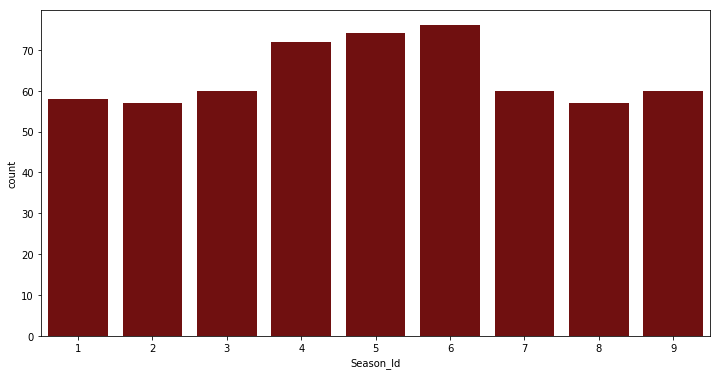

In [117]:
plt.figure(figsize=(12,6))
sns.countplot(x='Season_Id', data=c2, color='maroon')
plt.show()

* More games were played in Season 4, 5 and 6. There were more teams in these years!

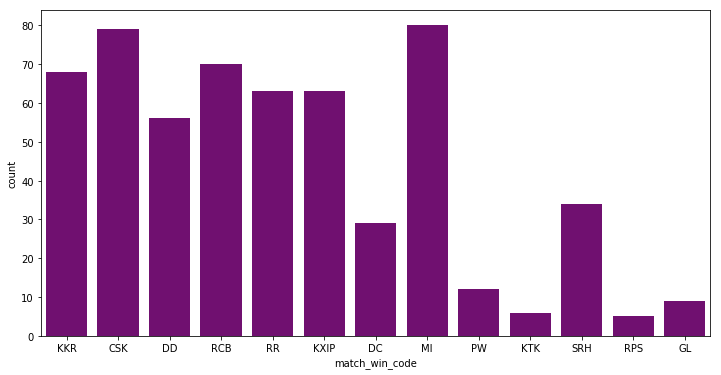

In [100]:
plt.figure(figsize=(12,6))
sns.countplot(x='match_win_code', data=c2, color='Purple')
plt.show()

* Some teams have clearly won more matches than the others, thus the playing and opponent teams are important in the model. 
* Some of these teams only played 2-3 seasons and can be ignored as outliers in the above graph.

In [31]:
c2['win_chasers'][c2['Season_Id'] == 1].sum()

36

In [49]:
y=c2.groupby('Season_Id')['win_chasers'].sum()

In [48]:
z=c2.groupby('Season_Id')['Season_Id'].count()
q=y/z
q.head(9)

Season_Id
1    0.620690
2    0.526316
3    0.466667
4    0.555556
5    0.540541
6    0.513158
7    0.616667
8    0.438596
9    0.683333
dtype: float64

Text(0,0.5,'Number of Winner')

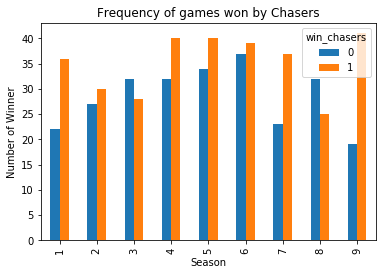

In [76]:
pd.crosstab(c2.Season_Id,c2.win_chasers).plot(kind='bar')
plt.title('Frequency of games won by Chasers')
plt.xlabel('Season')
plt.ylabel('Number of Winner')

* General trend shows more matches have been won by the chasing teams, except in season 8. Is this an anomoly or does it have meaning?

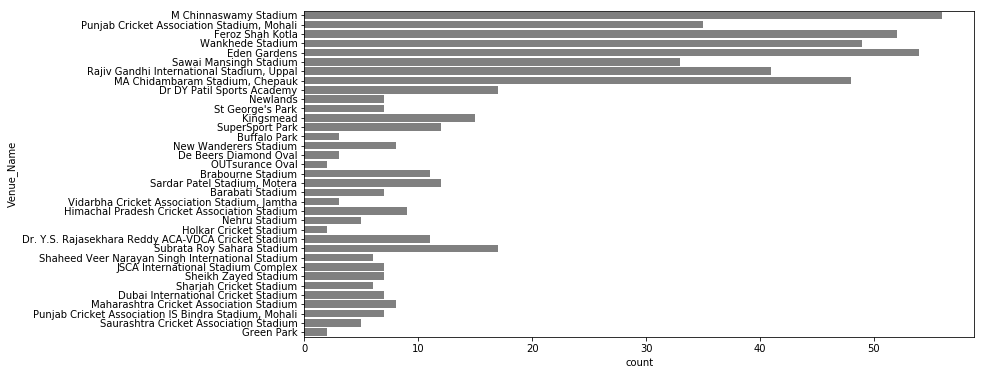

In [107]:
plt.figure(figsize=(12,6))
sns.countplot(y='Venue_Name', data=c2, color='grey')
plt.yticks(rotation='horizontal')
plt.show()

* More matches have been played at 8 stadiums than the rest. Could this affect our model? 
* Including dummies for stadiums might be out of scope for this project as we will have to introduce the factor of time as well. So for the scope of this, we will ignore this variable.

Text(0,0.5,'Number of Winner')

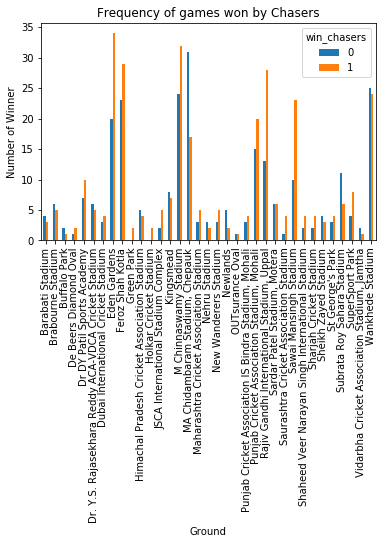

In [83]:
pd.crosstab(c2.Venue_Name,c2.win_chasers).plot(kind='bar')
plt.title('Frequency of games won by Chasers')
plt.yticks(rotation='horizontal')
plt.xlabel('Ground')
plt.ylabel('Number of Winner')

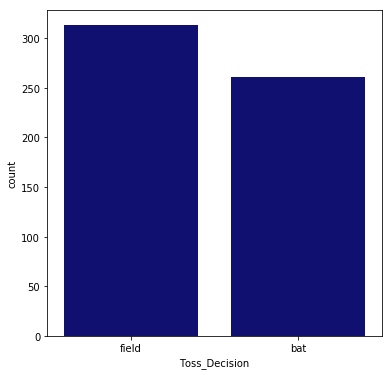

In [89]:
plt.figure(figsize=(6,6))
sns.countplot(x='Toss_Decision', data=c2, color='navy')
plt.show()

* Of the 574 matches, the division of choice to field and bat are almost equally distributed. 

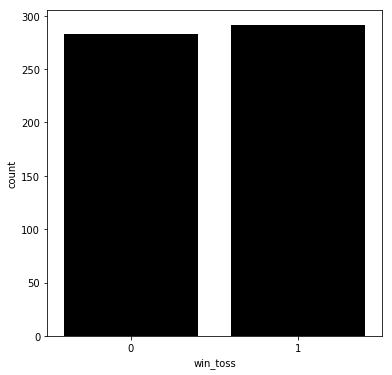

In [71]:
plt.figure(figsize=(6,6))
sns.countplot(x='win_toss', data=c2, color='black')
plt.show()

* The above shows whether the winning team had won the toss or lost the toss, and this shows that the division is almost equal, so we can say it does not bias the chances of winning for a team.

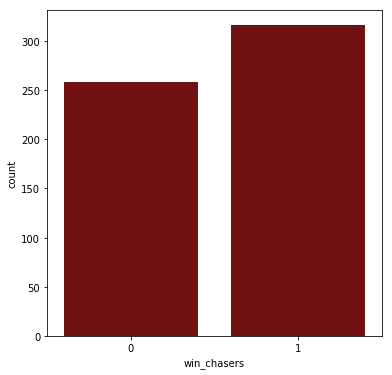

In [72]:
plt.figure(figsize=(6,6))
sns.countplot(x='win_chasers', data=c2, color='maroon')
plt.show()

* Chasers have won more games than the team that bats first. Is this significant?

In [65]:
c2.to_csv("ipl.csv")

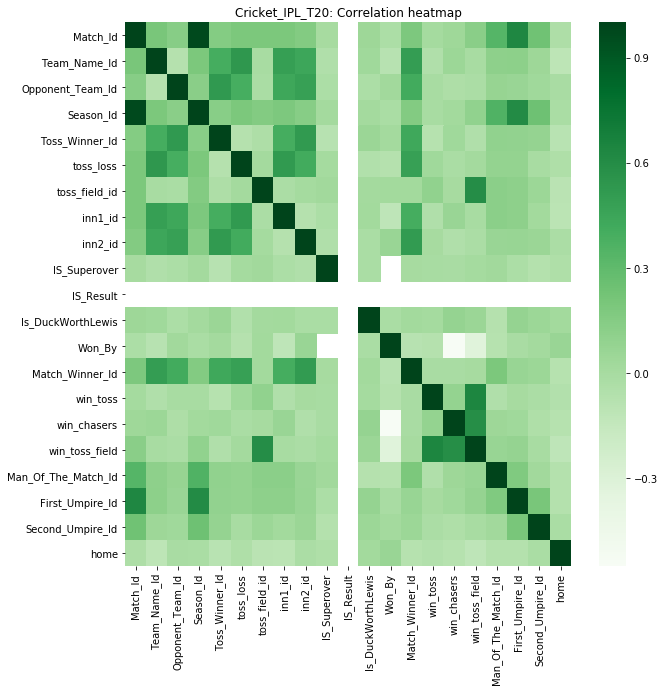

In [67]:
plt.subplots(figsize=(10,10))
ax = plt.axes()
ax.set_title("Cricket_IPL_T20: Correlation heatmap")
corr = c2.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, cmap="Greens")

* Match winners are more correlated with the team that loses the toss, than the team that won it.
* It is also more correlated to the second innings team (chasers) than the first innings team.

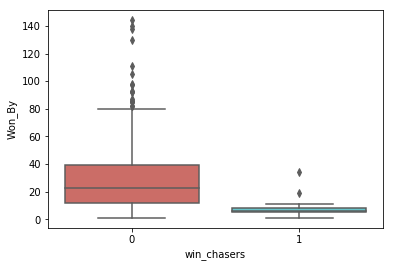

In [144]:
sns.boxplot(x='win_chasers', y='Won_By', data=c2, palette='hls')

* Won_by defines the number of runs (when the batting team wins) or number of wickets (when the chasing team wins) a team won by. 
* This is obvious distribution as the number of wickets are much smaller than number of runs in most cases.

In [113]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics 
from sklearn.metrics import classification_report

/Users/shreyasurana/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [109]:
list(c2)

['Match_Id',
 'Match_Date',
 'Team_Name_Id',
 'Opponent_Team_Id',
 'Season_Id',
 'Venue_Name',
 'Toss_Winner_Id',
 'toss_loss',
 'Toss_Decision',
 'toss_field_id',
 'inn1_id',
 'inn2_id',
 'IS_Superover',
 'IS_Result',
 'Is_DuckWorthLewis',
 'Win_Type',
 'Won_By',
 'Match_Winner_Id',
 'win_toss',
 'win_chasers',
 'win_toss_field',
 'Man_Of_The_Match_Id',
 'First_Umpire_Id',
 'Second_Umpire_Id',
 'City_Name',
 'Host_Country',
 'home',
 'match_win_name',
 'match_win_code']

### Modeling
#### 3.2.1. Models for predicting probability of winning when chasing

#### Model 1: y= win_chasers
* Xs (to start with): Home team, opposing team, toss winner to field, chasing team, superover flag, D/L flag, win for the toss winners, Umpire, home ground for winner.

In [126]:
X = c2.iloc[:,[2,3,6,9,11,12,14,18,22,26]].values
y = c2.iloc[:,19].values

In [127]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2)

In [119]:
list(c2)

['Match_Id',
 'Match_Date',
 'Team_Name_Id',
 'Opponent_Team_Id',
 'Season_Id',
 'Venue_Name',
 'Toss_Winner_Id',
 'toss_loss',
 'Toss_Decision',
 'toss_field_id',
 'inn1_id',
 'inn2_id',
 'IS_Superover',
 'IS_Result',
 'Is_DuckWorthLewis',
 'Win_Type',
 'Won_By',
 'Match_Winner_Id',
 'win_toss',
 'win_chasers',
 'win_toss_field',
 'Man_Of_The_Match_Id',
 'First_Umpire_Id',
 'Second_Umpire_Id',
 'City_Name',
 'Host_Country',
 'home',
 'match_win_name',
 'match_win_code']

In [129]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [131]:
X_test.shape

(115, 10)

In [132]:
y_test.shape

(115,)

In [133]:
y_pred = logreg.predict(X_test)

In [138]:
from sklearn.metrics import r2_score, accuracy_score

In [139]:
accuracy_score(y_test,y_pred)

0.4956521739130435

#### Model 2, y= win of the chasers, dropping Xs: superover, DL

In [166]:
X = c2.iloc[:,[2,3,6,9,11,18,22,26]].values
y = c2.iloc[:,19].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2)

In [167]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)

In [168]:
accuracy_score(y_test,y_pred)

0.53913043478260869

#### Model 3, y= win of the chasers, dropping Xs: home

In [169]:
X = c2.iloc[:,[2,3,6,9,11,18,22]].values
y = c2.iloc[:,19].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2)

In [170]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)

In [171]:
accuracy_score(y_test,y_pred)

0.4956521739130435

#### 3.2.2. Models for predicting probability of winning when chosing to field after winning the toss

#### Model 4: y= win of chasers when toss won and chosen to field

In [145]:
X = c2.iloc[:,[2,3,6,9,11,12,14,18,22,26]].values
y = c2.iloc[:,20].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2)

In [146]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)

In [147]:
accuracy_score(y_test,y_pred)

1.0

#### Take away 
* Overfitting
* Winning a game after chosing to field is correlated to chosing to field, can attribute overfittign to this.

#### Model 3, iterating Model 2 without the x representing choice to field

In [148]:
X = c2.iloc[:,[2,3,6,11,12,14,18,22,26]].values
y = c2.iloc[:,20].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2)

In [149]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)
accuracy_score(y_test,y_pred)

0.83478260869565213

### 4. Conclusion

#### Model 5 shows 83% accuracy and can be used by the captain to decide if he should favour choosing to field and better the probability of winning the game by doing so!